# Programacion Dinamica Grafos



In [1]:
class abstract_graph:
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges} | {v for u,v in self.edges}
    
    def adjacency_list(self):
        pass
    
class weighted_graph(abstract_graph):
    
    def __init__(self,_edges):
        self.edges=_edges
        self.nodes={u for u,v in self.edges.keys()} | {v for u,v in self.edges.keys()}    
    
    def adjacency_list(self):
        adjacent=lambda n : {v:self.edges[(u,v)] for u,v in self.edges.keys() if u==n }
        return {v:adjacent(v) for v in self.nodes}

In [72]:
import heapq
import numpy as np

def Dijkstra(G,start):
    if start not in G.nodes:
        return None
    neighbors=G.adjacency_list()
    path={}    
    path.update({start:None})
    distance={}
    distance.update({start:0})
    frontier=[]
    heapq.heappush(frontier,(0,start))
    while frontier:
        dist_u,u=heapq.heappop(frontier)
        for v in neighbors[u]:
            dist_v=dist_u+G.edges[(u,v)]
            if v not in distance.keys() or dist_v<distance[v]:
                path.update({v:u})
                distance.update({v:dist_v})
                heapq.heappush(frontier,(dist_v,v))
    return path,distance


def shortest_path(parent,end):
    path=[end]
    k=end
    while k is not None:
        path.append(parent[k])
        k=parent[k]
    return path[:-1][::-1]

In [73]:
# Ejemplo de "Grokking algorithms". A. Bhargava. p. 131

E={('start','a'):6,('start','b'):2,('b','a'):3,('a','fin'):1,
   ('b','fin'):5}

G=weighted_graph(E)

print('Nodos :',G.nodes)
print('Lista de adyacencia :',G.adjacency_list())
path,dist=Dijkstra(G,'start')
print('Distancias mas cortas :', dist)

print('Ruta',shortest_path(path,'fin'))

Nodos : {'start', 'fin', 'a', 'b'}
Lista de adyacencia : {'start': {'a': 6, 'b': 2}, 'fin': {}, 'a': {'fin': 1}, 'b': {'a': 3, 'fin': 5}}
Distancias mas cortas : {'start': 0, 'a': 5, 'b': 2, 'fin': 6}
Ruta ['start', 'b', 'a', 'fin']


{'start': ['start'], 'a': ['start', 'b', 'a'], 'b': ['start', 'b'], 'fin': ['start', 'b', 'a', 'fin']}


/home/sergio/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/sergio/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


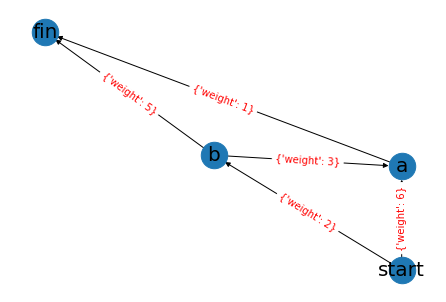

In [74]:
import networkx as nx
import matplotlib.pyplot as plt

G=nx.DiGraph()

E_nx=[(e[0],e[1],k) for e,k in E.items()]
G.add_weighted_edges_from(E_nx)
#pos=nx.circular_layout(G)
pos = nx.spring_layout(G)
print(nx.single_source_dijkstra_path(G,source='start'))

nx.draw(G,pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edge_labels(G,pos,font_color='red')
plt.show()

In [69]:
# Ejemplo de "Discrete Mathematics and its Applications". K.H. Rosen 7th Edition. p 713 

E={('a','b'):4,('b','a'):4,('b','d'):5,('d','b'):5,
   ('a','c'):2,('c','a'):2,('c','b'):1,('b','c'):1,
   ('c','d'):8,('d','c'):8,('e','c'):10,('c','e'):10,
   ('d','e'):2,('e','d'):2,('d','z'):6,('z','d'):6,
   ('e','z'):3,('z','e'):3}

G=weighted_graph(E)


print('Nodos :',G.nodes)
print('Lista de adyacencia :',G.adjacency_list())

start='a'
path,distance=Dijkstra(G,start)
print('Distancias : ',distance)
print('Camino mas corto : ',shortest_path(path,'z'))

Nodos : {'b', 'e', 'z', 'a', 'd', 'c'}
Lista de adyacencia : {'b': {'a': 4, 'd': 5, 'c': 1}, 'e': {'c': 10, 'd': 2, 'z': 3}, 'z': {'d': 6, 'e': 3}, 'a': {'b': 4, 'c': 2}, 'd': {'b': 5, 'c': 8, 'e': 2, 'z': 6}, 'c': {'a': 2, 'b': 1, 'd': 8, 'e': 10}}
Distancias :  {'a': 0, 'b': 3, 'c': 2, 'd': 8, 'e': 10, 'z': 13}
Camino mas corto :  ['a', 'c', 'b', 'd']


{'a': ['a'], 'b': ['a', 'c', 'b'], 'c': ['a', 'c'], 'd': ['a', 'c', 'b', 'd'], 'e': ['a', 'c', 'b', 'd', 'e'], 'z': ['a', 'c', 'b', 'd', 'e', 'z']}


/home/sergio/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/sergio/.local/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


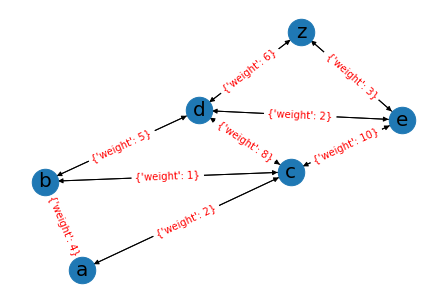

In [71]:
G=nx.DiGraph()

E_nx=[(e[0],e[1],k) for e,k in E.items()]
G.add_weighted_edges_from(E_nx)
pos=nx.spring_layout(G)

print(nx.single_source_dijkstra_path(G,source='a'))

nx.draw(G,pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edge_labels(G,pos,font_color='red')
plt.show()

In [75]:
random_graph = lambda n,p : {(u,v):np.random.randint(1,10) for u in np.arange(n) for v 
                    in np.arange(n) if np.random.rand()>p and u!=v}
# cantidad de vértices
n=10
# 1- probabilidad de crear aristas
p=0.5

E=random_graph(n,p)

G=weighted_graph(E)
print 'nodos : ',G.nodes
print '-------------------------------------'
print 'aristas : ',G.edges
print '-------------------------------------'
print 'lista adyacencia : ',G.adjacency_list()
print '-------------------------------------'
# chequear que el grafo sea conexo y que el vértice inicial exista!
start=0
D,U=Dijkstra(G,start)

print 'Distancias : ',D
print '-------------------------------------'
print 'Padres : ',U
print '-------------------------------------'
print 'Camino mas corto : ',shortest_path(U,0,9)

nodos :  set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
-------------------------------------
aristas :  {(5, 9): 5, (4, 7): 7, (1, 3): 4, (9, 1): 1, (4, 8): 7, (3, 0): 8, (2, 8): 5, (9, 8): 2, (8, 0): 9, (6, 9): 5, (0, 7): 4, (6, 2): 5, (1, 6): 6, (9, 4): 1, (2, 5): 7, (8, 5): 4, (0, 3): 8, (5, 8): 1, (4, 0): 9, (7, 4): 8, (7, 6): 7, (6, 3): 7, (1, 5): 7, (3, 6): 3, (8, 6): 3, (5, 3): 9, (9, 7): 2, (2, 7): 3, (3, 2): 5, (2, 6): 1, (8, 2): 4, (7, 1): 2, (4, 5): 4, (1, 4): 4, (7, 5): 2, (2, 1): 2, (8, 7): 7, (4, 2): 4, (1, 0): 8, (0, 8): 3, (6, 5): 7, (3, 5): 3, (0, 1): 5, (8, 3): 5, (7, 0): 2, (6, 8): 1, (3, 1): 7, (3, 8): 4, (4, 3): 7, (0, 9): 7, (1, 9): 3}
-------------------------------------
lista adyacencia :  {0: {8: 3, 1: 5, 3: 8, 9: 7, 7: 4}, 1: {0: 8, 3: 4, 4: 4, 5: 7, 6: 6, 9: 3}, 2: {8: 5, 1: 2, 5: 7, 6: 1, 7: 3}, 3: {0: 8, 1: 7, 2: 5, 5: 3, 6: 3, 8: 4}, 4: {0: 9, 2: 4, 3: 7, 5: 4, 7: 7, 8: 7}, 5: {8: 1, 9: 5, 3: 9}, 6: {8: 1, 9: 5, 2: 5, 3: 7, 5: 7}, 7: {0: 2, 1: 2, 4: 8, 5: 2, 6: 7},

True
{0: [0], 1: [0, 1], 2: [0, 8, 2], 3: [0, 3], 4: [0, 9, 4], 5: [0, 7, 5], 6: [0, 8, 6], 7: [0, 7], 8: [0, 8], 9: [0, 9]}
{0: 0, 1: 5, 2: 7, 3: 8, 4: 8, 5: 6, 6: 6, 7: 4, 8: 3, 9: 7}


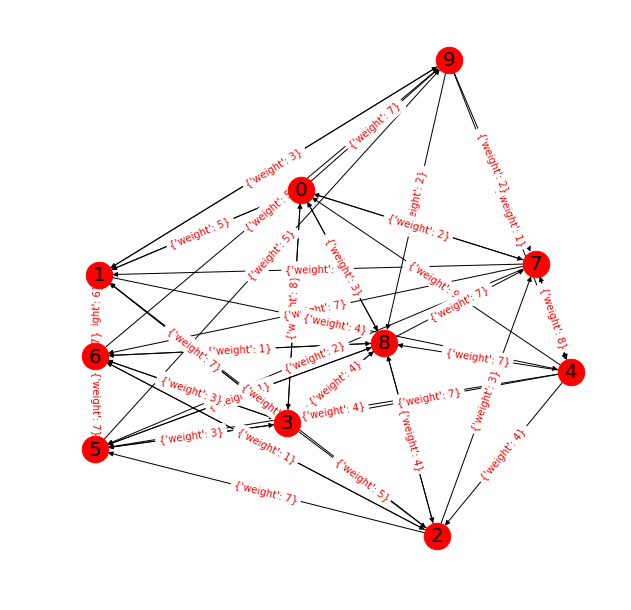

In [76]:
G=nx.DiGraph()

E_nx=[(e[0],e[1],w) for e,w in E.items()]
G.add_weighted_edges_from(E_nx)
pos=nx.spring_layout(G)
print nx.has_path(G,0,7)
print(nx.single_source_dijkstra_path(G,source=0))
print(nx.single_source_dijkstra_path_length(G,0,9))
plt.figure(figsize=(8,8))
nx.draw(G,pos, node_size=700)
nx.draw_networkx_labels(G, pos, font_size=20, font_family='sans-serif')
nx.draw_networkx_edge_labels(G,pos,font_color='red')
plt.show()

# Tarea

En esta tarea Ud. debe comprobar las siguientes hipótesis:

    1.) La complejidad del algoritmo Dijsktra depende de la cantidad de aristas del grafo.
    2.) El peor caso del algoritmo Bellman-Ford se produce cuando el grafo es denso (gran cantidad de aristas).
    3.) Cuando se requiere calcular las distancias más cortas entre todos los vértices del grafo, independiente de la cantidad de vértices el algoritmo Floyd-Warshall mejora el tiempo de ejecución de la fuerza bruta.